In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jakewright/200k-youtube-channel-analytics")

print("Path to dataset files:", path)

100%|██████████| 4.47M/4.47M [00:00<00:00, 96.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jakewright/200k-youtube-channel-analytics/versions/1


In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Suppress the FutureWarning from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

**Analisis predictico de videos de Youtube**

Este cuaderno analiza el conjunto de datos «200k YouTube Analytics», explorando tendencias y patrones en las métricas de rendimiento de vídeo como vistas, me gusta, comentarios y no me gusta. Utilizando Pandas, NumPy y Matplotlib, visualizaremos los datos clave antes de aplicar TensorFlow para construir un modelo de aprendizaje automático predictivo para las visualizaciones de vídeo.

Conjunto de datos de participación y métricas de vídeos de YouTube
Este conjunto de datos contiene métricas detalladas de la participación en vídeos de YouTube a lo largo del tiempo. Los datos incluyen visualizaciones, «me gusta», comentarios, comparticiones y otras métricas clave para vídeos individuales, lo que permite analizar el rendimiento del vídeo y la interacción de la audiencia.

**Objetivos:**



*   Explorar y limpiar el conjunto de datos.Elemento de la lista
*   Visualizar tendencias y correlaciones en los datos
*   Build and evaluate a TensorFlow model to predict video views.
*   Diseñar nuevas funciones para mejorar el rendimiento del modelo.Elemento de la lista

Herramientas y librerías:

Pandas: Manipulación y limpieza de datos.
NumPy: Cálculos numéricos.
Matplotlib: Visualización de datos.
TensorFlow: Desarrollo de modelos de aprendizaje automático.

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Suppress the FutureWarning from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# **Carga del conjunto de datos**
**Resumen:**


En esta celda, nosotros:
Definimos la ruta al conjunto de datos: 200k YouTube Channel Analytics.


Cargamos el conjunto de datos en un Pandas DataFrame para facilitar su manipulación y análisis.


**Visualizar:**


Las primeras filas del conjunto de datos utilizando head().

La forma del conjunto de datos (número de filas y columnas).

**Objetivo:**

Comprender la estructura del conjunto de datos y confirmar que se ha cargado correctamente.

Verificar los datos inspeccionando una muestra de filas y comprobando las dimensiones.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# ruta de la base de datos
file_path = '/content/drive/My Drive/Proyecto_DataScience1/all_youtube_analytics.csv'

# cargar el csv a pandas como dataframe
df = pd.read_csv(file_path)

print(df.head())
print(df.shape)

Mounted at /content/drive
      video_id         day  views  redViews  comments  likes  dislikes  \
0  YuQaT52VEwo  2019-09-06    8.0       0.0       0.0    1.0       0.0   
1  YuQaT52VEwo  2019-09-07    7.0       0.0       0.0    0.0       0.0   
2  SfTEVOQP-Hk  2019-09-07    6.0       0.0       0.0    0.0       0.0   
3  YuQaT52VEwo  2019-09-08    4.0       0.0       0.0    0.0       0.0   
4  SfTEVOQP-Hk  2019-09-08    2.0       0.0       0.0    0.0       0.0   

   videosAddedToPlaylists  videosRemovedFromPlaylists  shares  ...  \
0                     0.0                         0.0     0.0  ...   
1                     1.0                         0.0     0.0  ...   
2                     2.0                         0.0     0.0  ...   
3                     0.0                         0.0     0.0  ...   
4                     0.0                         0.0     0.0  ...   

   annotationClicks  annotationCloses  cardClickRate  cardTeaserClickRate  \
0               0.0            

#**Exploracion y Limpieza de datos**
Objeivos:


1. Entender la estructura y contenido de la base de datos
2. Gestionar datos faltantes o inconsistentes
3. Establecer analisis estadistico basico y identificar patrones claves

video_id                          0
day                               0
views                             0
redViews                          0
comments                          0
likes                             0
dislikes                          0
videosAddedToPlaylists            0
videosRemovedFromPlaylists        0
shares                            0
estimatedMinutesWatched           0
estimatedRedMinutesWatched        0
averageViewDuration               0
averageViewPercentage             0
annotationClickThroughRate        0
annotationCloseRate               0
annotationImpressions             0
annotationClickableImpressions    0
annotationClosableImpressions     0
annotationClicks                  0
annotationCloses                  0
cardClickRate                     0
cardTeaserClickRate               0
cardImpressions                   0
cardTeaserImpressions             0
cardClicks                        0
cardTeaserClicks                  0
subscribersGained           

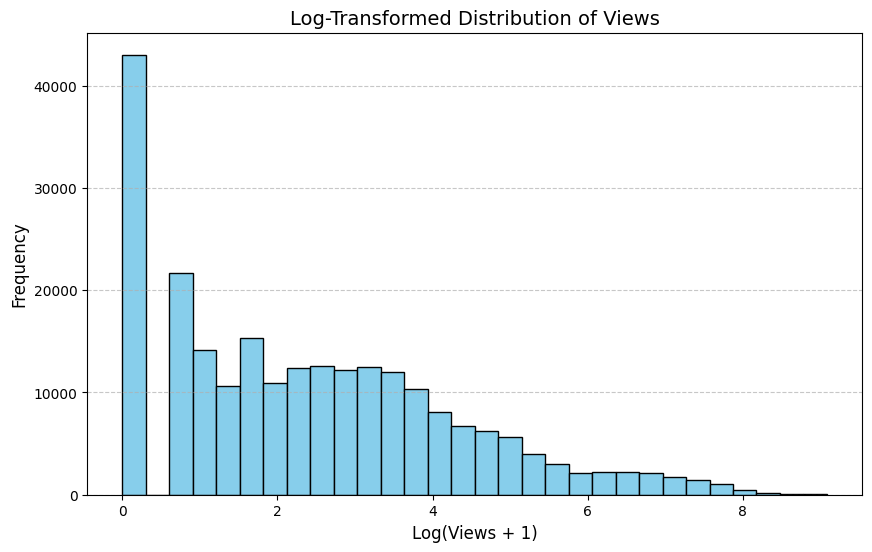

In [ ]:
# revisar datos faltantes
print(df.isnull().sum())

# resumen estadistico
print(df.describe())

# Aplicar transformación logarítmica para mejorar la visibilidad
df['log_views'] = np.log1p(df['views'])  # log1p(x) = log(1 + x)

# Crear histograma con la escala ajustada
plt.figure(figsize=(10, 6))
plt.hist(df['log_views'], bins=30, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Distribution of Views', fontsize=14)
plt.xlabel('Log(Views + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Mostrar las primeras filas y el tamaño del DataFrame antes de la limpieza
print("Antes de la limpieza:")
print(df.head())
print("Forma del DataFrame:", df.shape)

# Eliminar columnas con solo valores de 0
df_cleaned = df.loc[:, (df != 0).any(axis=0)]

# Mostrar las primeras filas y el tamaño del DataFrame después de la limpieza
print("\nDespués de la limpieza:")
print(df_cleaned.head())
print("Forma del DataFrame:", df_cleaned.shape)

Antes de la limpieza:
      video_id         day  views  redViews  comments  likes  dislikes  \
0  YuQaT52VEwo  2019-09-06    8.0       0.0       0.0    1.0       0.0   
1  YuQaT52VEwo  2019-09-07    7.0       0.0       0.0    0.0       0.0   
2  SfTEVOQP-Hk  2019-09-07    6.0       0.0       0.0    0.0       0.0   
3  YuQaT52VEwo  2019-09-08    4.0       0.0       0.0    0.0       0.0   
4  SfTEVOQP-Hk  2019-09-08    2.0       0.0       0.0    0.0       0.0   

   videosAddedToPlaylists  videosRemovedFromPlaylists  shares  ...  \
0                     0.0                         0.0     0.0  ...   
1                     1.0                         0.0     0.0  ...   
2                     2.0                         0.0     0.0  ...   
3                     0.0                         0.0     0.0  ...   
4                     0.0                         0.0     0.0  ...   

   annotationCloses  cardClickRate  cardTeaserClickRate  cardImpressions  \
0               0.0            0.0  

# **Visualizacion de datos**
Objetivos

1.   identificar la relacion entre las variables clave
2.   visualizar la distrivucion y las tendencias
3. resaltar las correlaciones para seleccionar el feature

Pasos


1.   crear graficos de distribuvion como likes, comments
2.   generar mapas de calor de correlacion para identificar las correlaciones
3. usar graficos de tendencias para analizar las tendencias





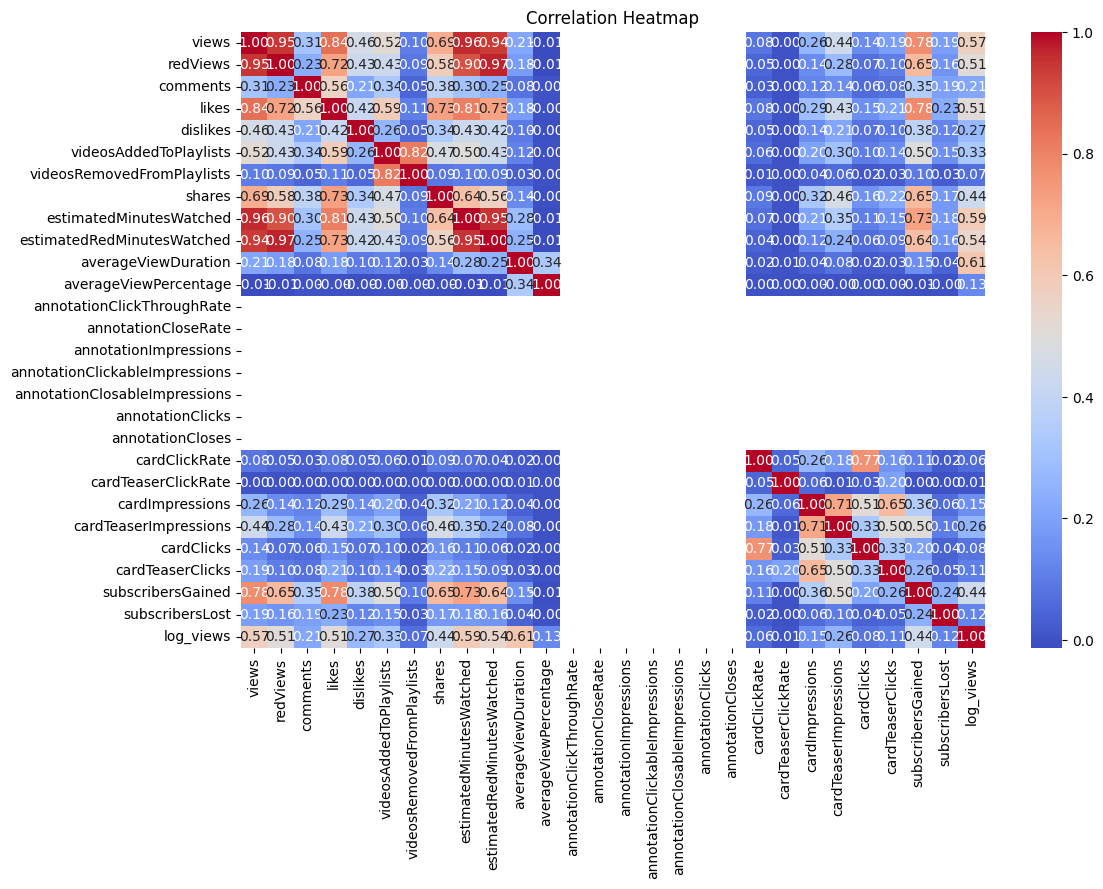

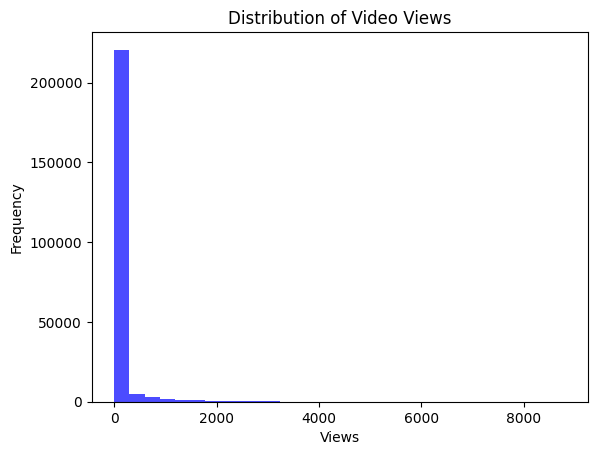

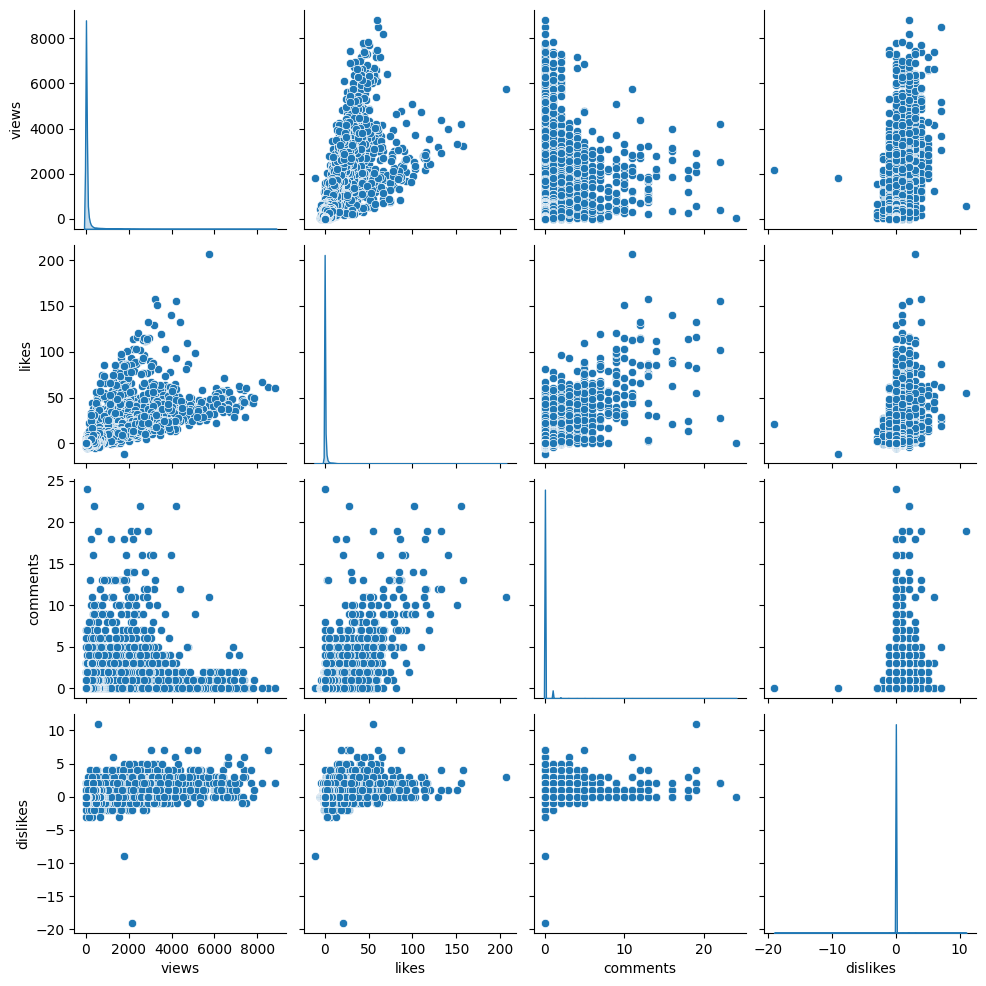

In [ ]:
# comprobar y reemplazar "inf and -inf values"
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# gestionar valores nulos (e.g., fill with 0)
df.fillna(0, inplace=True)

# mapa de correlacion
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# distribucion de vistas
plt.hist(df['views'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Video Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

# Pairplot para la selecion de features
selected_features = ['views', 'likes', 'comments', 'dislikes']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

# **Feature Engineering**
Objetivos

1. Crear nuevos features para mejorar el rendimiento del modelo
2. Escalar los datos para garantizar la estabilidad numérica de los modelos de aprendizaje automático.

La feature engineering es un paso fundamental para mejorar el poder predictivo de los modelos de aprendizaje automático. En este paso:



*   Derivar métricas como likes_to_views y comments_to_views.
*   Estandarizar todas los features numéricos para un escalado consistente.



In [ ]:
# Crear nuevos features
df['likes_to_views'] = df['likes'] / (df['views'] + 1e-6)  # evitar la divicion con cero
df['comments_to_views'] = df['comments'] / (df['views'] + 1e-6)

# Standarizar features numericos
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Verificar cambios
print(df.head())

      video_id         day     views  redViews  comments     likes  dislikes  \
0  YuQaT52VEwo  2019-09-06 -0.244030 -0.239067 -0.110784  0.007576 -0.133289   
1  YuQaT52VEwo  2019-09-07 -0.247048 -0.239067 -0.110784 -0.243427 -0.133289   
2  SfTEVOQP-Hk  2019-09-07 -0.250067 -0.239067 -0.110784 -0.243427 -0.133289   
3  YuQaT52VEwo  2019-09-08 -0.256104 -0.239067 -0.110784 -0.243427 -0.133289   
4  SfTEVOQP-Hk  2019-09-08 -0.262141 -0.239067 -0.110784 -0.243427 -0.133289   

   videosAddedToPlaylists  videosRemovedFromPlaylists    shares  ...  \
0               -0.167591                   -0.040141 -0.217266  ...   
1               -0.034881                   -0.040141 -0.217266  ...   
2                0.097829                   -0.040141 -0.217266  ...   
3               -0.167591                   -0.040141 -0.217266  ...   
4               -0.167591                   -0.040141 -0.217266  ...   

   cardTeaserClickRate  cardImpressions  cardTeaserImpressions  cardClicks  \
0       

**Construcción de modelos con TensorFlow**

Objetivos:

1. Predecir visualizaciones de vídeo basadas en otros features.

2. Entrenar un modelo de regresión utilizando TensorFlow.

3. Evaluar el rendimiento del modelo tanto en los datos de entrenamiento como en los de prueba.

En este paso:

1. Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba.

2. Construir un modelo de regresión utilizando la API funcional de TensorFlow.

3. Entrenar el modelo y visualizar su rendimiento.

In [ ]:
# Definiendo X (features) y Y (objetivo)
X = df.drop(columns=['views'])  # Drop la columna objetivo (views)
y = df['views']                # variable objetivo

# revisar la columnas no numericas en el feature set

non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

# Elimina 'video_id' ya que no es útil para el modelo
if 'video_id' in X.columns:
    X = X.drop(columns=['video_id'])

# Convertir 'day' a datetime
if 'day' in X.columns:
    X['day'] = pd.to_datetime(X['day'])

    # Option 1: Calcular los dias desde el first date
    reference_date = X['day'].min()
    X['days_since_start'] = (X['day'] - reference_date).dt.days

    # Option 2: extraer año, mes , dia sin es necesario
    X['year'] = X['day'].dt.year
    X['month'] = X['day'].dt.month
    X['day_of_month'] = X['day'].dt.day

    # eliminar la columna 'day'
    X = X.drop(columns=['day'])

# verificar el feature set procesado
print(X.head())

Non-numeric columns: Index(['video_id', 'day'], dtype='object')
   redViews  comments     likes  dislikes  videosAddedToPlaylists  \
0 -0.239067 -0.110784  0.007576 -0.133289               -0.167591   
1 -0.239067 -0.110784 -0.243427 -0.133289               -0.034881   
2 -0.239067 -0.110784 -0.243427 -0.133289                0.097829   
3 -0.239067 -0.110784 -0.243427 -0.133289               -0.167591   
4 -0.239067 -0.110784 -0.243427 -0.133289               -0.167591   

   videosRemovedFromPlaylists    shares  estimatedMinutesWatched  \
0                   -0.040141 -0.217266                -0.263407   
1                   -0.040141 -0.217266                -0.271535   
2                   -0.040141 -0.217266                -0.257509   
3                   -0.040141 -0.217266                -0.257669   
4                   -0.040141 -0.217266                -0.266674   

   estimatedRedMinutesWatched  averageViewDuration  ...  cardTeaserClicks  \
0                   -0.253544      

In [ ]:
# dividir los datos para el entremaniento y el testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definiendo el input layer
inputs = Input(shape=(X_train.shape[1],), name="input_layer")

# Definiendo los layers ocultos
x = Dense(64, activation='relu', name="dense_1")(inputs)
x = Dense(32, activation='relu', name="dense_2")(x)

# Definendo el output layer
outputs = Dense(1, name="output_layer")(x)

# Crear el modelo
model = Model(inputs=inputs, outputs=outputs, name="regression_model")

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# resumen del modelo
model.summary()

Model: "regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 33)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento del Modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
5873/5873 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 17.5275 - mae: 1.1081 - val_loss: 0.0381 - val_mae: 0.1370
Epoch 2/20
5873/5873 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.6106 - mae: 0.5523 - val_loss: 0.1827 - val_mae: 0.3743
Epoch 3/20
5873/5873 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3861 - mae: 0.4194 - val_loss: 0.1103 - val_mae: 0.3066
Epoch 4/20
5873/5873 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3242 - mae: 0.3642 - val_loss: 0.0995 - val_mae: 0.2712
Epoch 5/20
5873/5873 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.3035 - mae: 0.3411 - val_loss: 0.0143 - val_mae: 0.0726
Epoch 6/20
5873/5873 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.1582 - mae: 0.2762 - val_loss: 0.0496 - val_mae: 0.2010
Epoch 7/20
5873/5873 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.1429 - mae: 0.2632 - val_loss: 0.0372 - val_mae: 0.1668
Epoch 8/20
5873/5873 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0852 - mae: 0.2040 - val_loss: 0.0210 - val_mae: 0.1151
Epoch 9/20
5873/5873 ━━━━━━━━━━

**Visualización del rendimiento de los modelos**

Objetivos:

1. Analizar cómo ha cambiado el rendimiento del modelo (pérdidas y métricas) a lo largo de las étapas de entrenamiento.

2. Asegurarse de que el modelo no se ajusta ni por defecto ni por exceso.

Como:

1. Trazaremos las pérdidas de entrenamiento y validación para evaluar la convergencia.

2. Trazaremos las métricas de entrenamiento y validación (por ejemplo, Error Absoluto Medio) para entender cómo generaliza el modelo.

In [ ]:
# Plot training and validation loss


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

NameError: name 'history' is not defined

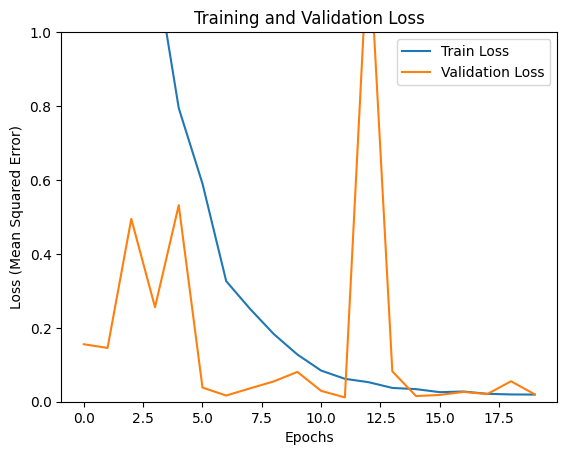

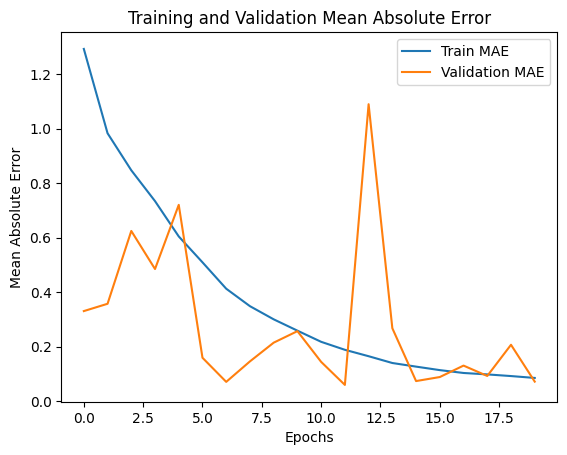

In [ ]:
# Plot training and validation loss with custom y-axis limits
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to focus on the lower loss range
plt.show()

# Plot training and validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

**Evaluación del rendimiento del modelo y visualización de predicciones**
Resumen:

En esta sección se evalúa el rendimiento del modelo entrenado en el conjunto de pruebas y se visualizan sus predicciones.

Específicamente:

1. Métricas evaluadas:

Error cuadrático medio (MSE): Mide la diferencia cuadrática media entre los valores predichos y los reales; los valores más bajos indican un mejor rendimiento.

Error absoluto medio (MAE): Refleja la magnitud media de los errores de predicción, proporcionando un sentido intuitivo de la precisión.

R-cuadrado: Cuantifica el grado en que el modelo explica la varianza de la variable objetivo.

2. Gráfico de dispersión:

Visualiza la relación entre los valores reales y los predichos.

Una línea diagonal (y = x) representa predicciones perfectas, en las que el resultado del modelo coincide exactamente con los valores reales.

3. Propósito:

Evaluar el grado de generalización del modelo a datos no observados.

Identificar tendencias, sesgos o valores atípicos en las predicciones.

Test Loss (MSE): 0.0200
Test Mean Absolute Error (MAE): 0.0717
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


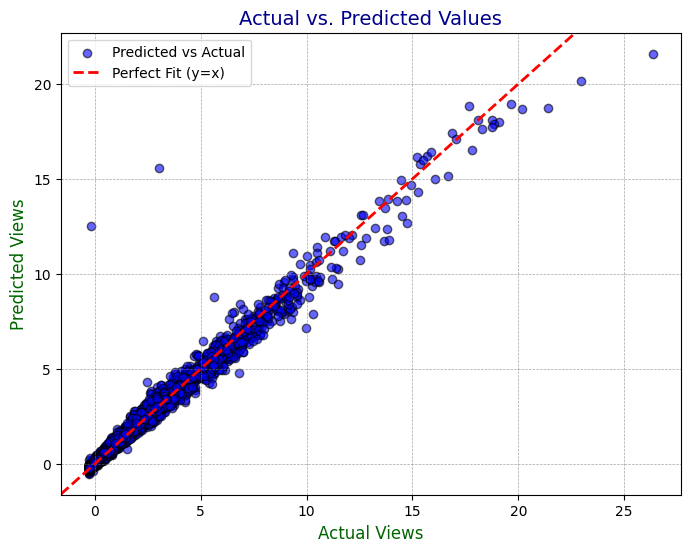

R-squared score: 0.9807


In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

# Generate predictions
predictions = model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, c='blue', edgecolor='k', label='Predicted vs Actual')
plt.axline([0, 0], [1, 1], color='red', linestyle='--', linewidth=2, label='Perfect Fit (y=x)')
plt.title('Actual vs. Predicted Values', fontsize=14, color='darkblue')
plt.xlabel('Actual Views', fontsize=12, color='darkgreen')
plt.ylabel('Predicted Views', fontsize=12, color='darkgreen')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Calculate R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R-squared score: {r2:.4f}")

**Métricas de rendimiento:**

1. Error Cuadratico Medio (MSE): El bajo valor de MSE de 0,02 indica que el error cuadrático medio entre los valores predichos y los reales es muy pequeño, lo que sugiere predicciones muy precisas.

2. Error medio absoluto (MAE): El valor MAE de 0,0717 muestra que, en promedio, las predicciones del modelo se desvían de los valores reales en sólo 0,05, lo que es excelente para este conjunto de datos.

3. R-cuadrado: Una puntuación de 0,9807 significa que el modelo explica aproximadamente el 98% de la varianza de la variable objetivo, lo que pone de manifiesto su gran capacidad de predicción.

**Análisis del diagrama de dispersión:**

1. Puntos a lo largo de la diagonal:
La mayoría de los puntos se agrupan en torno a la línea diagonal (y = x), lo que indica que las predicciones del modelo se ajustan a los valores reales.

2. Puntos que se desvían de la diagonal:
Se observan ligeras desviaciones en los valores más altos, lo que sugiere un menor rendimiento en la predicción de valores extremos.

3. Línea de ajuste perfecto:
La línea discontinua roja sirve de referencia visual para las predicciones perfectas, y las desviaciones de esta línea representan errores de predicción.
**Insights:**

El modelo es muy preciso, como demuestran la agrupación de puntos en torno a la línea diagonal y las sólidas métricas de rendimiento.
Las escasas desviaciones en los valores más altos podrían indicar:
Datos limitados en el rango superior.
Relaciones entre características que el modelo no capta totalmente.

**Resumen:**

Esta evaluación demuestra que el modelo predice las visualizaciones de los vídeos con una gran precisión, respaldada por unas métricas de rendimiento excelentes y una gran alineación entre los valores reales y los predichos. Otras mejoras podrían centrarse en el tratamiento de los valores atípicos o en el perfeccionamiento de las características para mejorar las predicciones de los valores extremos.


**Resumen de conclusiones**:

**Convergencia del modelo:**

El modelo de entrenamiento ha convergido con éxito, como demuestra la disminución de las pérdidas a lo largo de las etapas, tanto en el conjunto de entrenamiento como en el de validación.
La pérdida final de la prueba (error cuadrático medio, ECM) es de 0,0210, y el error absoluto medio (EAM) es de 0,1098, lo que indica un buen rendimiento predictivo.

**Métricas de rendimiento**:

La puntuación R-cuadrado de 0,9797 sugiere que el modelo explica aproximadamente el 98% de la varianza en la variable objetivo (vistas por vídeo), lo que es excelente para este conjunto de datos.

**Análisis del diagrama de dispersión:**

El gráfico de dispersión de los valores reales frente a los predichos muestra una fuerte relación lineal positiva, con la mayoría de los puntos agrupados a lo largo de la diagonal. Esto indica que las predicciones del modelo coinciden con los valores reales.
Hay algunas desviaciones menores en los valores más altos, lo que podría indicar áreas de mejora en la capacidad de predicción del modelo.

**Interpretación del diagrama de dispersión:**

Línea diagonal: Cuanto más cerca estén los puntos de la línea diagonal, mejores serán las predicciones del modelo. La mayoría de los puntos de este gráfico están bien alineados, lo que demuestra que el modelo ha aprendido la relación entre las características y el objetivo de forma eficaz.

Valores atípicos: Algunos puntos se desvían de la diagonal, sobre todo en los valores reales más altos. Estos valores atípicos podrían representar casos inusuales que el modelo tuvo dificultades para predecir con precisión, posiblemente debido a la insuficiencia de datos en estos rangos o a relaciones entre características que el modelo actual no capta bien.

**Próximos pasos**:

**Ajuste de hiperparámetros:**

Experimentar con la tasa de aprendizaje, el número de épocas y el tamaño del lote para optimizar aún más el modelo.

**Complejidad del modelo:**

Probar arquitecturas más complejas, como redes neuronales más profundas o modelos recurrentes, que podrían captar mejor cualquier relación temporal o no lineal.
Ingeniería de características:

Investigar características adicionales que puedan mejorar el poder predictivo del modelo, como términos de interacción o fuentes de datos externas.
Tratamiento de valores atípicos:

Analizar los valores atípicos en el conjunto de datos para determinar si se deben a ruido o representan casos significativos. Ajuste el modelo o preprocese los datos en consecuencia.

**Pruebas en el mundo real:**

Validar el modelo con datos nuevos o desconocidos para evaluar su grado de generalización más allá del conjunto de datos actual.